<a href="https://colab.research.google.com/github/anisaafn/2025_Visi-Komputer_TI-2B/blob/master/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jobsheet 2: Klasifikasi Gambar


## **Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana**


Bayangkan Anda baru pertama kali mengenalkan komputer pada dunia visual. Sebelum komputer bisa mengenali gambar kompleks seperti mobil atau wajah manusia, mari kita ajarkan dulu konsep sederhana: mengenali angka tulisan tangan. Dataset MNIST yang berisi digit 0–9 adalah titik awal yang bagus.

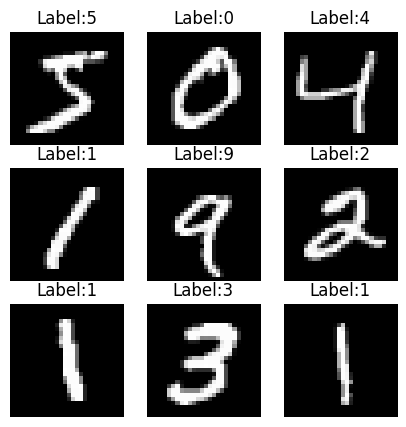

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range (9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')

plt.show()

**Tugas kecil:** Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

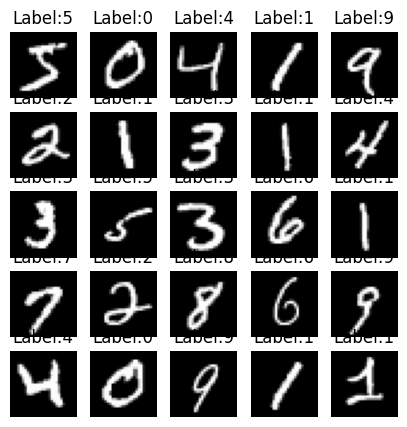

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')

plt.show()

## **Praktikum D2 Klasifikasi Gambar dengan Model Machine Learning Tradisional**

Sebelum CNN populer, pendekatan klasik digunakan. Mari kita coba Support Vector Machine (SVM). Dataset yang kita pakai tetap MNIST, tapi gambar harus diubah menjadi vektor 1D.
Langkah di Google Colab:
1.	Flatten setiap gambar 28x28 menjadi vektor 784.
2.	Gunakan sklearn.svm.SVC untuk melatih model sederhana.
3.	Uji model pada data test dan lihat akurasinya.


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

#prediksi
y_pred = clf.predict(x_test_flat)

#Akurasi
print("Akurasi:", accuracy_score (y_test, y_pred))

Akurasi: 0.9101


**Tugas kecil:** Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

#prediksi
y_pred = clf.predict(x_test_flat)

#Akurasi
print("Akurasi:", accuracy_score (y_test, y_pred))

Akurasi: 0.9513


## **Praktikum D3 – Membangun CNN Sederhana**

Sekarang saatnya mencoba Convolutional Neural Network. CNN akan belajar mengenali pola dari gambar MNIST secara otomatis.
Langkah di Google Colab:
1.	Ubah data menjadi bentuk [samples, height, width, channels].
2.	Bangun CNN sederhana dengan Conv2D, MaxPooling2D, Flatten, dan Dense.
3.	Latih model dan amati hasilnya.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8963 - loss: 0.3438 - val_accuracy: 0.9815 - val_loss: 0.0659
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9790 - loss: 0.0667 - val_accuracy: 0.9858 - val_loss: 0.0547
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9860 - val_loss: 0.0565
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9923 - loss: 0.0271 - val_accuracy: 0.9847 - val_loss: 0.0606
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.9865 - val_loss: 0.0568


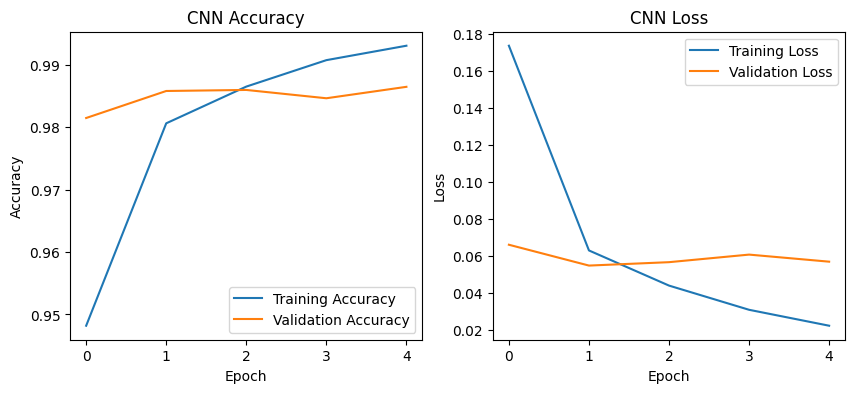

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist # Tambahkan import mnist

# Load data MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Tugas kecil:** Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8887 - loss: 0.3584 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9844 - loss: 0.0536 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9894 - loss: 0.0335 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9918 - val_loss: 0.0377


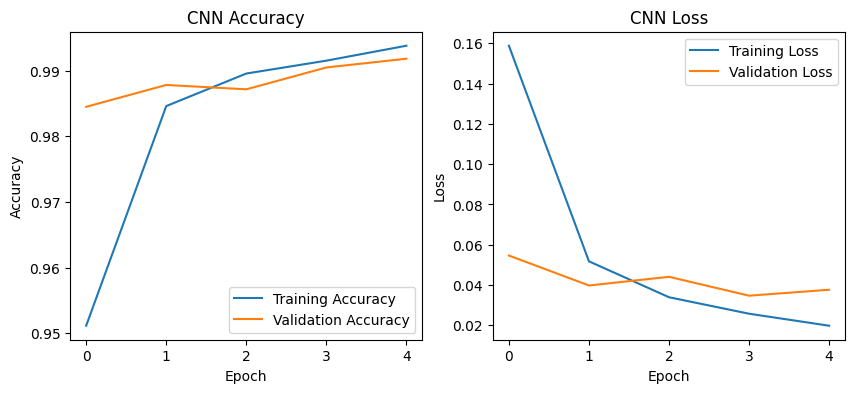

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D4 Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)**

MNIST mudah. Sekarang mari coba CIFAR-10, yang berisi gambar berwarna (mobil, pesawat, anjing, kucing, dll). Ini membuat model CNN bekerja lebih keras.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.3640 - loss: 1.7378 - val_accuracy: 0.5674 - val_loss: 1.2346
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.5876 - loss: 1.1709 - val_accuracy: 0.6070 - val_loss: 1.1065
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6481 - loss: 1.0115 - val_accuracy: 0.6500 - val_loss: 1.0154
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6806 - loss: 0.9203 - val_accuracy: 0.6878 - val_loss: 0.9143
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7084 - loss: 0.8334 - val_accuracy: 0.6824 - val_loss: 0.9210
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7281 - loss: 0.7760 - val_accuracy: 0.6944 - val_loss: 0.8869
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7503 - loss: 0.7214 - val_accuracy: 0.7012 - val_loss: 0.8816
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7661 -

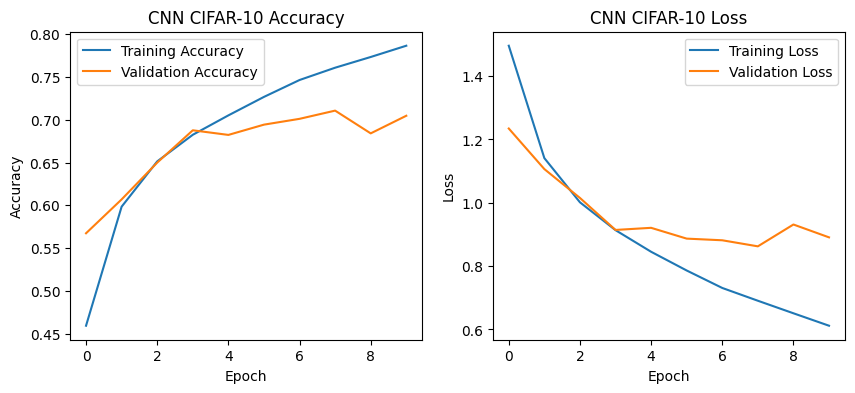

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Tugas kecil:** Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.2697 - loss: 1.9640 - val_accuracy: 0.5062 - val_loss: 1.3958
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.4397 - loss: 1.5305 - val_accuracy: 0.5502 - val_loss: 1.2477
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.4904 - loss: 1.3937 - val_accuracy: 0.6038 - val_loss: 1.1401
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5237 - loss: 1.3092 - val_accuracy: 0.5968 - val_loss: 1.1357
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5462 - loss: 1.2550 - val_accuracy: 0.6366 - val_loss: 1.0532
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.5704 - loss: 1.1855 - val_accuracy: 0.6578 - val_loss: 1.0011
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5908 - loss: 1.1404 - val_accuracy: 0.6570 - val_loss: 0.9991
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6012 -

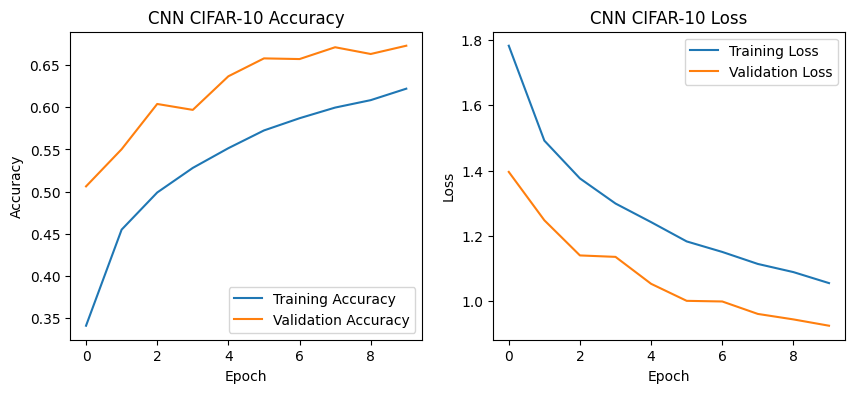

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # <<< Tambahkan Dropout di sini
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D5: Transfer Learning dengan Model Pra-Latih**

Bagaimana jika kita gunakan “otak” yang sudah cerdas? Misalnya VGG16 atau ResNet50 yang sudah dilatih di ImageNet. Kita tinggal memanfaatkannya.


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 642s 455ms/step - accuracy: 0.4571 - loss: 1.5574 - val_accuracy: 0.5826 - val_loss: 1.2181
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 622s 442ms/step - accuracy: 0.5790 - loss: 1.2123 - val_accuracy: 0.5852 - val_loss: 1.1771
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 635s 451ms/step - accuracy: 0.6007 - loss: 1.1512 - val_accuracy: 0.5922 - val_loss: 1.1616
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 686s 454ms/step - accuracy: 0.6144 - loss: 1.1066 - val_accuracy: 0.6034 - val_loss: 1.1305
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 687s 457ms/step - accuracy: 0.6299 - loss: 1.0674 - val_accuracy: 0.6018 - val_loss: 1.1224


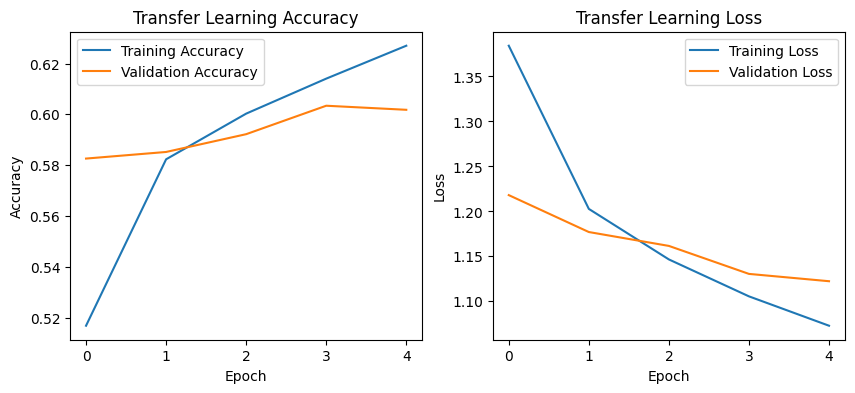

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze layer VGG16

# Bangun model transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Tugas kecil:** Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

0 block4_pool trainable: False
1 block5_conv1 trainable: False
2 block5_conv2 trainable: False
3 block5_conv3 trainable: True
4 block5_pool trainable: True
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 827s 558ms/step - accuracy: 0.3490 - loss: 1.9054 - val_accuracy: 0.5658 - val_loss: 1.2922
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 742s 515ms/step - accuracy: 0.5714 - loss: 1.2706 - val_accuracy: 0.6042 - val_loss: 1.1592
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 737s 512ms/step - accuracy: 0.6104 - loss: 1.1453 - val_accuracy: 0.6248 - val_loss: 1.0941
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 738s 509ms/step - accuracy: 0.6299 - loss: 1.0840 - val_accuracy: 0.6402 - val_loss: 1.0556
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 745s 512ms/step - accuracy: 0.6478 - loss: 1.0329 - val_accuracy: 0.6458 - val_loss: 1.0263


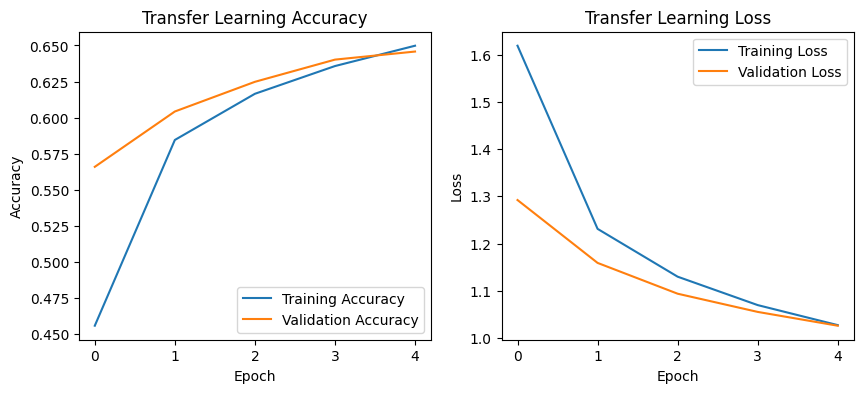

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# --- Fine-tuning: aktifkan 1–2 layer terakhir ---
# Bekukan semua layer terlebih dahulu
for layer in base_model.layers:
    layer.trainable = False

# Aktifkan 2 layer terakhir (misal: conv5_block3_conv2 & conv5_block3_conv3)
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Cek status trainable (opsional)
for i, layer in enumerate(base_model.layers[-5:]):  # lihat 5 terakhir
    print(i, layer.name, "trainable:", layer.trainable)

# Bangun model transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Gunakan learning rate lebih kecil saat fine-tuning agar tidak merusak bobot pretrained
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D6: Evaluasi dengan Confusion Matrix dan Metrik Lain**

Model sudah dilatih, tapi bagaimana cara mengevaluasi secara lebih detail? Akurasi saja tidak cukup. Mari tampilkan confusion matrix dan hitung precision, recall, serta F1-score.

313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 422ms/step
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1000
           1       0.74      0.69      0.71      1000
           2       0.65      0.44      0.53      1000
           3       0.46      0.50      0.48      1000
           4       0.56      0.58      0.57      1000
           5       0.60      0.49      0.54      1000
           6       0.60      0.76      0.67      1000
           7       0.69      0.70      0.70      1000
           8       0.77      0.73      0.75      1000
           9       0.69      0.69      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000



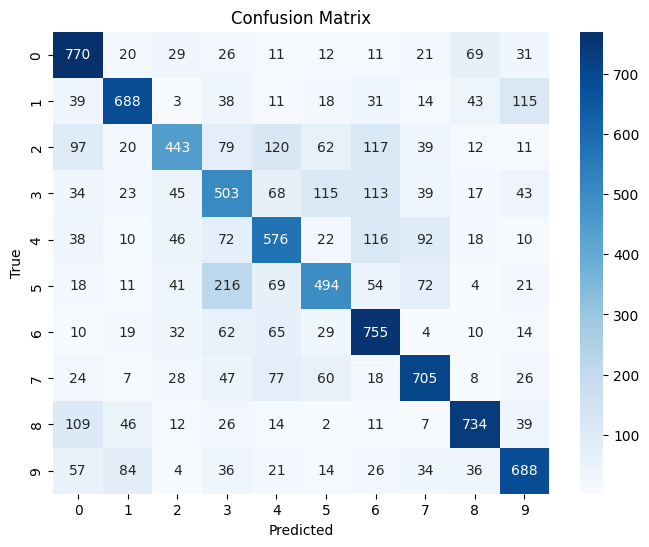

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(x_test).argmax(axis=1)

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Tugas kecil:** Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi?

**Jawaban:**


#Penugasan

1.	Kumpulkan Laporan Praktikum dari jobsheet ini dalam bentuk Microsoft word sesuai dengan format jobsheet praktikum dan dikumpulkan di web LMS. (JANGAN DALAM BENTUK PDF)
2.	Kumpulkan luaran kode praktikum dalam bentuk ipynb yang sudah diunggah pada akun github masing-masing. Lampirkan tautan github yang sudah di unggah melalui laman LMS.
3.	Mencoba klasifikasi tulisan angka:  
•	Tulis 1–3 digit (0–9) di kertas putih dengan spidol/bolpen tebal (ukuran besar, kontras jelas).
•	Foto lurus dari atas, pencahayaan merata, tanpa bayangan besar.
•	Upload foto ke Google Colab.
•	Pre-process gambar agar sesuai format MNIST (28×28, grayscale).
•	Klasifikasi dengan salah satu model:
o	CNN (D3) → butuh tensor shape (1, 28, 28, 1)
o	SVM (D2) → butuh vektor 784 (flatten 28×28)
Catatan penting: Jalankan dulu praktikum D2 (untuk clf SVM) atau D3 (untuk model CNN) sehingga objek model sudah ada di memori notebook. Pilih salah satu sesuai yang Anda gunakan.
Kode Colab: Upload & Pre-process
Tempatkan sel ini setelah Anda selesai melatih model (D2 atau D3).

## D3 CNN
(Pilihan A) Prediksi dengan CNN dari D3
Pastikan Anda sudah menjalankan D3 dan memiliki variabel model (Keras) terlatih pada MNIST.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Bangun CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8655 - loss: 0.4242 - val_accuracy: 0.9850 - val_loss: 0.0485
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9760 - loss: 0.0810 - val_accuracy: 0.9876 - val_loss: 0.0389
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9903 - val_loss: 0.0309
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9856 - loss: 0.0493 - val_accuracy: 0.9910 - val_loss: 0.0262
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9884 - loss: 0.0380 - val_accuracy: 0.9908 - val_loss: 0.0299


In [30]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """

    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit putih di latar gelap
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1 + 1, y1 + 1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1] dan tambah channel dim (28,28,1)
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]

    return canvas, arr

Saving IMG-20250922-WA0083.jpg to IMG-20250922-WA0083.jpg
Saving IMG-20250922-WA0082.jpg to IMG-20250922-WA0082.jpg


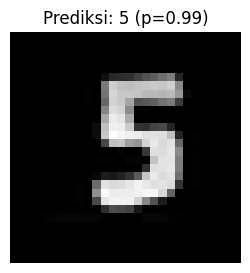

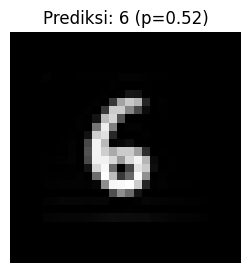


Rekap Prediksi (CNN):
- IMG-20250922-WA0083.jpg -> 5 (p=0.986)
- IMG-20250922-WA0082.jpg -> 6 (p=0.515)


In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


results = []
if 'model' not in locals():
    print("FATAL ERROR: Variabel 'model' (CNN) tidak ditemukan. Pastikan Anda sudah melatih model di praktikum D3.")
else:
    for fname in uploaded.keys():
        try:
            img_pil = Image.open(fname)
        except Exception as e:
            print(f"Error saat membuka file {fname}: {e}")
            continue

        # disp: PIL untuk ditampilkan, x: (28,28,1)
        disp, x = preprocess_to_mnist_28x28(img_pil)

        # Ubah ke shape yang dibutuhkan CNN: (1, 28, 28, 1)
        x_batch = np.expand_dims(x, axis=0)

        # Prediksi menggunakan model CNN (Keras)
        probs = model.predict(x_batch, verbose=0)[0]
        pred = int(np.argmax(probs))
        conf = float(np.max(probs))

        results.append((fname, pred, conf))

        # Tampilkan hasil
        plt.figure(figsize=(3,3))
        plt.imshow(disp, cmap='gray')
        plt.title(f"Prediksi: {pred} (p={conf:.2f})")
        plt.axis('off')
        plt.show()

    # Rekap ringkas
    print("\nRekap Prediksi (CNN):")
    for r in results:
        print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

## D2

In [34]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    if arr.mean() > 127:  # jika background putih → invert
        img = ImageOps.invert(img)
        arr = np.array(img)

    # cari bounding box digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # resize dengan rasio ke 20x20
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # padding ke 28x28
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)

    return canvas, arr

In [38]:
from sklearn.metrics import accuracy_score
from PIL import Image

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)  # x: (28,28,1) float [0,1]

    # Flatten ke (1,784) untuk SVM
    x_flat = x.reshape(1, -1)

    # Prediksi dengan SVM
    pred = int(clf.predict(x_flat)[0])

    # Ambil probabilitas jika tersedia (butuh clf dilatih dengan probability=True)
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    # Tampilkan hasil prediksi
    if conf is not None:
        print(f"{fname} -> Prediksi SVM: {pred} (p≈{conf:.2f})")
    else:
        print(f"{fname} -> Prediksi SVM: {pred}")

IMG-20250922-WA0083.jpg -> Prediksi SVM: 5
IMG-20250922-WA0082.jpg -> Prediksi SVM: 4


## SVM probabilitas=True

In [39]:
from sklearn import svm

# Latih ulang SVM dengan probability=True
clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)
clf.fit(x_train_flat, y_train)

SVC(probability=True)

In [40]:
from PIL import Image
import numpy as np

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)  # (28,28,1)

    # Flatten ke (1,784)
    x_flat = x.reshape(1, -1)

    # Prediksi label
    pred = int(clf.predict(x_flat)[0])

    # Ambil probabilitas tertinggi
    probs = clf.predict_proba(x_flat)[0]  # array shape (10,)
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    print(f"{fname} -> Prediksi SVM: {pred} (p≈{conf:.2f})")


IMG-20250922-WA0083.jpg -> Prediksi SVM: 3 (p≈0.29)
IMG-20250922-WA0082.jpg -> Prediksi SVM: 4 (p≈0.96)
